## Configuramos entorno
Se importan paqueterías

In [2]:
import pandas as pd
import numpy as np
from copy import deepcopy

import warnings
import datetime as dt

pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
from plotly.subplots import make_subplots

import plotly.express as px
init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")

# import matplotlib as mpl
# plt.style.use('seaborn') 
# mpl.rcParams['font.family'] = 'serif'
print ("Setup Complete")

Setup Complete


##### Indexado de funnciones en una paqueteria

In [3]:
[var_temp for var_temp in dir(pd) if "read" in var_temp]

['read_clipboard',
 'read_csv',
 'read_excel',
 'read_feather',
 'read_fwf',
 'read_gbq',
 'read_hdf',
 'read_html',
 'read_json',
 'read_orc',
 'read_parquet',
 'read_pickle',
 'read_sas',
 'read_spss',
 'read_sql',
 'read_sql_query',
 'read_sql_table',
 'read_stata',
 'read_table',
 'read_xml']

## Importamos data
Se cargan los archivos que contienen la data que se va a analizar

In [4]:
covid_path = r"data/covid_19_data.csv"
covid_data = pd.read_csv(covid_path)
# covid_data = pd.read_csv(covid_path, parse_dates=['ObservationDate','Last Update'])

cofirmed_path = r'data/time_series_covid_19_confirmed.csv'
confirmed_data = pd.read_csv(cofirmed_path)

recoverd_path = r'data/time_series_covid_19_recovered.csv'
recoverd_data = pd.read_csv(recoverd_path)

death_path = r'data/time_series_covid_19_deaths.csv'
death_data = pd.read_csv(death_path)

##### Se hace una exploración de la data

In [4]:
# covid_file.shape <- (285307, 8)
covid_data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [5]:
covid_data.tail()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
285302,285303,05/02/2021,Zaporizhia Oblast,Ukraine,2021-05-03 04:20:39,96531.0,1919.0,78700.0
285303,285304,05/02/2021,Zeeland,Netherlands,2021-05-03 04:20:39,26045.0,233.0,0.0
285304,285305,05/02/2021,Zhejiang,Mainland China,2021-05-03 04:20:39,1344.0,1.0,1322.0
285305,285306,05/02/2021,Zhytomyr Oblast,Ukraine,2021-05-03 04:20:39,84641.0,1597.0,68529.0
285306,285307,05/02/2021,Zuid-Holland,Netherlands,2021-05-03 04:20:39,359327.0,4138.0,0.0


In [134]:
muestra = int(covid_data.shape[0]*.40)
covid_data.sample(10,random_state=muestra)

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
270727,2021-04-13,Unknown,Germany,2021-04-14 04:20:41,9660.0,0.0,0.0
120507,2020-09-28,Not know,Luxembourg,2021-04-02 15:13:53,8376.0,124.0,7128.0
68234,2020-07-19,Yukon,Canada,2021-04-02 15:13:53,13.0,0.0,11.0
131354,2020-10-12,Nagasaki,Japan,2021-04-02 15:13:53,241.0,3.0,233.0
38228,2020-06-08,Xinjiang,Mainland China,2021-04-02 15:13:53,76.0,3.0,73.0
99577,2020-08-31,Not know,Cameroon,2021-04-02 15:13:53,19142.0,411.0,17651.0
242638,2021-03-08,Not know,North Macedonia,2021-04-02 15:13:53,107479.0,3206.0,95410.0
215459,2021-01-31,Liaoning,Mainland China,2021-04-02 15:13:53,400.0,2.0,384.0
173324,2020-12-07,Capital District,Colombia,2021-04-02 15:13:53,390902.0,8744.0,361727.0
262596,2021-04-03,Assam,India,2021-04-04 04:20:49,218601.0,1107.0,215549.0


In [26]:
print('El tamaño del dataset covid-19 es : ','renglones',covid_data.shape[0],'///','columnas',covid_data.shape[1]) 

El tamaño del dataset covid-19 es :  renglones 285307 /// columnas 8


In [7]:
covid_data.info()
# covid_data.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285307 entries, 0 to 285306
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              285307 non-null  int64  
 1   ObservationDate  285307 non-null  object 
 2   Province/State   212318 non-null  object 
 3   Country/Region   285307 non-null  object 
 4   Last Update      285307 non-null  object 
 5   Confirmed        285307 non-null  float64
 6   Deaths           285307 non-null  float64
 7   Recovered        285307 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 17.4+ MB


### Reshaping and pivot tables
##### Contruyendo un dataframe con variables de tiempo (ObservationDate) y valores de Muertes confirmadas

df.drop_duplicated(sub=['col_nam']).pivot(index=['col_nam_1'.'col_nam_2'],columns=['col_nam_1','col_nam_2'],values='col_nam_1')

pivot(index = , columns, values) es para ir de un panel de datos a una estructura dataframe donde la fecha es una caracteristica o variable (columna)

index-> el nombre de los indixes por los que quiero definir la nueva tabla

columns-> las variables que se convertiran en caracteriticas o variables

values-> es el conjuntp de columnas de donde se tomaran los valores con los que se llena la nueva tabla

In [5]:
# https://pandas.pydata.org/docs/user_guide/reshaping.html
# Quita los duplicados que hay en la columna 'Province/State'
covid_data.drop_duplicates(subset=['Province/State']).pivot(index=['Province/State','Country/Region'], 
                                                            columns=['ObservationDate','Last Update'],
                                                            values= 'Deaths')

# Quita los duplicados que hay en la columna 'Country/Region'
# covid_data.drop_duplicates(subset=['Country/Region']).pivot(index=['Province/State','Country/Region'],
#                                                            columns=['ObservationDate','Last Update'],
#                                                            values='Deaths')

ObservationDate                         01/22/2020    01/24/2020  \
Last Update                        1/22/2020 17:00 1/24/20 17:00   
Province/State      Country/Region                                 
NaN                 Japan                      0.0           NaN   
 Montreal, QC       Canada                     NaN           NaN   
 Norfolk County, MA US                         NaN           NaN   
Abruzzo             Italy                      NaN           NaN   
Acre                Brazil                     NaN           NaN   
...                                            ...           ...   
Zaporizhia Oblast   Ukraine                    NaN           NaN   
Zeeland             Netherlands                NaN           NaN   
Zhejiang            Mainland China             0.0           NaN   
Zhytomyr Oblast     Ukraine                    NaN           NaN   
Zuid-Holland        Netherlands                NaN           NaN   

ObservationDate                       01/25/2020    01/26/2020    01/27/2020  \
Last Update                        1/25/20 17:00 1/26/20 16:00 1/27/20 23:59   
Province/State      Country/Region                                             
NaN                 Japan                    NaN           NaN           NaN   
 Montreal, QC       Canada                   NaN           NaN           NaN   
 Norfolk County, MA US                       NaN           NaN           NaN   
Abruzzo             Italy                    NaN           NaN           NaN   
Acre                Brazil                   NaN           NaN           NaN   
...                                          ...           ...           ...   
Zaporizhia Oblast   Ukraine                  NaN           NaN           NaN   
Zeeland             Netherlands              NaN           NaN           NaN   
Zhejiang            Mainland China           NaN           NaN           NaN   
Zhytomyr Oblast     Ukraine                  NaN           NaN           NaN   
Zuid-Holland        Netherlands              NaN           NaN           NaN   

ObservationDate                       01/28/2020    01/30/2020     02/01/2020  \
Last Update                        1/28/20 23:00 1/30/20 16:00 2/1/2020 19:43   
Province/State      Country/Region                                              
NaN                 Japan                    NaN           NaN            NaN   
 Montreal, QC       Canada                   NaN           NaN            NaN   
 Norfolk County, MA US                       NaN           NaN            NaN   
Abruzzo             Italy                    NaN           NaN            NaN   
Acre                Brazil                   NaN           NaN            NaN   
...                                          ...           ...            ...   
Zaporizhia Oblast   Ukraine                  NaN           NaN            NaN   
Zeeland             Netherlands              NaN           NaN            NaN   
Zhejiang            Mainland China           NaN           NaN            NaN   
Zhytomyr Oblast     Ukraine                  NaN           NaN            NaN   
Zuid-Holland        Netherlands              NaN           NaN            NaN   

ObservationDate                                                   ...  \
Last Update                        2/1/2020 18:12 2/1/2020 19:53  ...   
Province/State      Country/Region                                ...   
NaN                 Japan                     NaN            NaN  ...   
 Montreal, QC       Canada                    NaN            NaN  ...   
 Norfolk County, MA US                        NaN            NaN  ...   
Abruzzo             Italy                     NaN            NaN  ...   
Acre                Brazil                    NaN            NaN  ...   
...                                           ...            ...  ...   
Zaporizhia Oblast   Ukraine                   NaN            NaN  ...   
Zeeland             Netherlands               NaN            

#### ¿Qué pasa cuando tengo valores duplicados?
Dime cuando tenga la misma provincia, país y día de observación

In [6]:
# covid_data['Province/State'].duplicated()
# covid_data.shape[0] <- 285307
# covid_data['Province/State'].duplicated().sum() <- 284569
# covid_data['Country/Region'].duplicated().sum() <- 285079
# covid_data['ObservationDate'].duplicated().sum() <- 284840
covid_data[covid_data.duplicated(subset=['Province/State','Country/Region','ObservationDate'])]

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
52,53,01/23/2020,Hubei,Mainland China,1/23/20 17:00,444.0,17.0,28.0
4974,4975,03/11/2020,Gansu,Mainland China,2020-03-11T02:18:28,0.0,0.0,0.0
4975,4976,03/11/2020,Hebei,Mainland China,2020-03-11T02:18:29,0.0,0.0,0.0
5196,5197,03/12/2020,Gansu,Mainland China,2020-03-11T02:18:28,0.0,0.0,0.0
5197,5198,03/12/2020,Hebei,Mainland China,2020-03-11T02:18:29,0.0,0.0,0.0


##### Por qué usamos el duplicated()

In [7]:
# covid_data.groupby(['Province/State']).size().sort_values()
covid_data.groupby(['Province/State','Country/Region','ObservationDate']).size().sort_values()
# Estos son los datos que se están repitiendo

Province/State  Country/Region  ObservationDate
 Montreal, QC   Canada          02/28/2020         1
Para            Brazil          09/05/2020         1
                                09/06/2020         1
                                09/07/2020         1
                                09/08/2020         1
                                                  ..
Gansu           Mainland China  03/11/2020         2
Hubei           Mainland China  01/23/2020         2
Gansu           Mainland China  03/12/2020         2
Hebei           Mainland China  03/11/2020         2
                                03/12/2020         2
Length: 212313, dtype: int64

##### Evaluemos para México

In [8]:
covid_data[covid_data['Country/Region'] == "Mexico"]

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
82,83,01/23/2020,NaN,Mexico,1/23/20 17:00,0.0,0.0,0.0
2716,2717,02/28/2020,NaN,Mexico,2020-02-28T15:03:26,1.0,0.0,0.0
2804,2805,02/29/2020,NaN,Mexico,2020-02-29T21:13:17,4.0,0.0,0.0
2926,2927,03/01/2020,NaN,Mexico,2020-03-01T23:33:03,5.0,0.0,0.0
3057,3058,03/02/2020,NaN,Mexico,2020-03-01T23:33:03,5.0,0.0,0.0
...,...,...,...,...,...,...,...,...
285219,285220,05/02/2021,Tlaxcala,Mexico,2021-05-03 04:20:39,19479.0,2394.0,0.0
285247,285248,05/02/2021,Unknown,Mexico,2021-05-03 04:20:39,0.0,0.0,1869529.0
285267,285268,05/02/2021,Veracruz,Mexico,2021-05-03 04:20:39,59870.0,9582.0,0.0
285296,285297,05/02/2021,Yucatan,Mexico,2021-05-03 04:20:39,37319.0,3636.0,0.0


Número de casos confirmados por País y Estado

<AxesSubplot:>

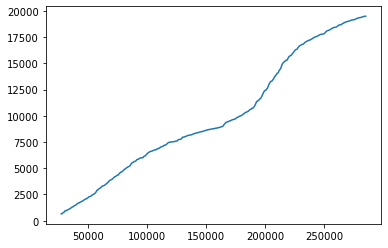

In [8]:
# covid_data[(covid_data['Country/Region'] == 'Mexico') & (covid_data['Province/State'] == 'Tlaxcala')].Confirmed
covid_data[(covid_data['Country/Region'] == 'Mexico') & (covid_data['Province/State'] == 'Tlaxcala')].Confirmed.plot()

In [12]:
confirmed_data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/23/21,4/24/21,4/25/21,4/26/21,4/27/21,4/28/21,4/29/21,4/30/21,5/1/21,5/2/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,58542,58730,58843,59015,59225,59370,59576,59745,59939,60122
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,130270,130409,130537,130606,130736,130859,130977,131085,131185,131238
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,120562,120736,120922,121112,121344,121580,121866,122108,122311,122522
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,13007,13024,13060,13083,13121,13148,13198,13232,13232,13282
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,25279,25492,25609,25710,25942,26168,26431,26652,26815,26993


In [13]:
confirmed_data.tail()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/23/21,4/24/21,4/25/21,4/26/21,4/27/21,4/28/21,4/29/21,4/30/21,5/1/21,5/2/21
270,NaN,Vietnam,14.058324,108.277199,0,2,2,2,2,2,...,2830,2833,2843,2852,2857,2865,2910,2928,2942,2962
271,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,289120,290259,290972,292052,293466,294550,295601,296462,296462,297638
272,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,6056,6105,6137,6183,6220,6263,6294,6317,6325,6341
273,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,91251,91317,91358,91378,91418,91484,91533,91586,91670,91693
274,NaN,Zimbabwe,-19.015438,29.154857,0,0,0,0,0,0,...,38045,38064,38086,38102,38164,38191,38235,38257,38260,38281


In [15]:
confirmed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Columns: 471 entries, Province/State to 5/2/21
dtypes: float64(2), int64(467), object(2)
memory usage: 1012.0+ KB


In [9]:
m = int(confirmed_data.shape[0]*40)
confirmed_data.sample(10,random_state=m)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/23/21,4/24/21,4/25/21,4/26/21,4/27/21,4/28/21,4/29/21,4/30/21,5/1/21,5/2/21
196,NaN,Netherlands,52.132600,5.291300,0,0,0,0,0,0,...,1445064,1453124,1461137,1467337,1472674,1481323,1488594,1496352,1502107,1507615
121,Guadeloupe,France,16.265000,-61.551000,0,0,0,0,0,0,...,12927,12927,12927,13770,13770,13770,13770,13770,13770,14634
120,French Polynesia,France,-17.679700,149.406800,0,0,0,0,0,0,...,18725,18734,18734,18739,18744,18746,18755,18758,18758,18758
267,NaN,Uzbekistan,41.377491,64.585262,0,0,0,0,0,0,...,88280,88679,89027,89355,89630,90008,90406,90808,91250,91643
133,NaN,Georgia,42.315400,43.356900,0,0,0,0,0,0,...,301535,302785,303751,304272,305850,307401,308834,310310,311457,312445
138,NaN,Guatemala,15.783500,-90.230800,0,0,0,0,0,0,...,219789,221307,221698,221939,223025,224621,226247,227671,228477,228684
71,Hubei,China,30.975600,112.270700,444,444,549,761,1058,1423,...,68157,68157,68157,68157,68157,68158,68158,68158,68158,68158
101,NaN,Czechia,49.817500,15.473000,0,0,0,0,0,0,...,1615461,1618068,1619383,1620206,1622777,1626033,1628536,1630758,1632932,1634114
109,NaN,Ecuador,-1.831200,-78.183400,0,0,0,0,0,0,...,371306,372754,373362,374775,375329,377662,380689,381862,384589,387299
10,Northern Territory,Australia,-12.463400,130.845600,0,0,0,0,0,0,...,159,160,164,164,165,165,166,166,166,166


In [25]:
confirmed_data['Country/Region'].unique()
# len(confirmed_data['Country/Region'].unique()) <- 192

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guin

In [41]:
confirmed_data[(confirmed_data['Country/Region'] == 'Mexico')]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/23/21,4/24/21,4/25/21,4/26/21,4/27/21,4/28/21,4/29/21,4/30/21,5/1/21,5/2/21
182,NaN,Mexico,23.6345,-102.5528,0,0,0,0,0,0,...,2323430,2326738,2328391,2329534,2333126,2336944,2340934,2344755,2347780,2348873


In [61]:
confirmed_data[(confirmed_data['Country/Region'] == 'Mexico')].iloc[:,4:].T

,182
1/22/20,0
1/23/20,0
1/24/20,0
1/25/20,0
1/26/20,0
...,...
4/28/21,2336944
4/29/21,2340934
4/30/21,2344755
5/1/21,2347780


<AxesSubplot:title={'center':'Número de casos confirmados en México'}, xlabel='Date', ylabel='Núm. casos'>

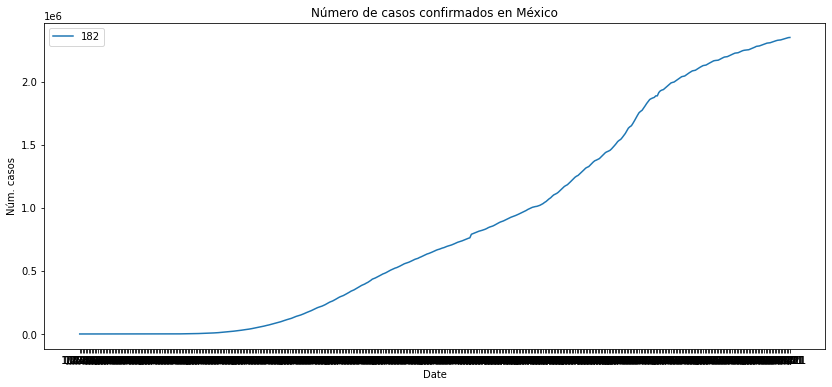

In [64]:
plt.figure(figsize=(14,6))
plt.title("COVID-19:Número de casos confirmados en México")
plt.xlabel('Date')
plt.ylabel('Núm. casos')
sns.lineplot(data = confirmed_data[(confirmed_data['Country/Region'] == 'Mexico')].iloc[:,4:].T)

<AxesSubplot:>

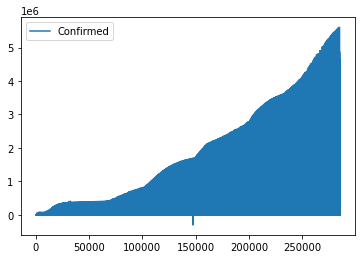

In [161]:
# covid_data['Confirmed'].plot()
covid_data[['Confirmed']].plot()

<AxesSubplot:ylabel='Frequency'>

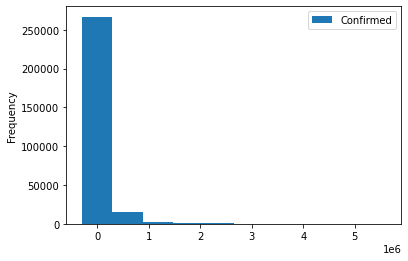

In [163]:
covid_data[['Confirmed']].plot.hist()

In [3]:
death_data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/23/21,4/24/21,4/25/21,4/26/21,4/27/21,4/28/21,4/29/21,4/30/21,5/1/21,5/2/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,2565,2572,2582,2592,2598,2611,2618,2625,2631,2637
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,2367,2372,2378,2379,2383,2386,2389,2394,2396,2397
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,3190,3198,3207,3217,3225,3234,3244,3253,3261,3270
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,123,124,124,124,124,125,125,125,125,127
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,574,577,579,583,587,591,594,596,600,602


In [4]:
death_data.tail()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/23/21,4/24/21,4/25/21,4/26/21,4/27/21,4/28/21,4/29/21,4/30/21,5/1/21,5/2/21
270,NaN,Vietnam,14.058324,108.277199,0,0,0,0,0,0,...,35,35,35,35,35,35,35,35,35,35
271,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,3138,3151,3167,3184,3201,3206,3231,3249,3249,3272
272,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,1165,1175,1187,1205,1207,1216,1222,1226,1229,1233
273,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,1245,1245,1246,1248,1249,1249,1250,1251,1251,1253
274,NaN,Zimbabwe,-19.015438,29.154857,0,0,0,0,0,0,...,1556,1556,1557,1560,1565,1565,1567,1567,1568,1570


In [5]:
death_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Columns: 471 entries, Province/State to 5/2/21
dtypes: float64(2), int64(467), object(2)
memory usage: 1012.0+ KB


In [8]:
death_data[death_data['Country/Region'] == 'Mexico'].iloc[:,4:].T

,182
1/22/20,0
1/23/20,0
1/24/20,0
1/25/20,0
1/26/20,0
...,...
4/28/21,215918
4/29/21,216447
4/30/21,216907
5/1/21,217168


<AxesSubplot:title={'center':'COVID-19:Número de muertes en México'}, xlabel='Date', ylabel='Núm. muertes'>

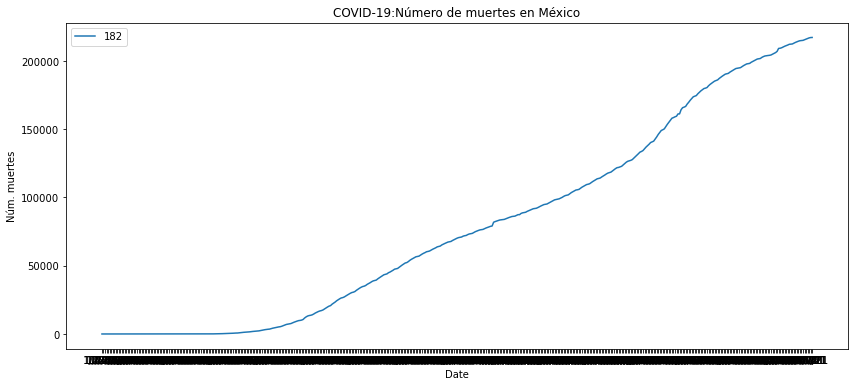

In [10]:
plt.figure(figsize=(14,6))
plt.title("COVID-19:Número de muertes en México")
plt.xlabel('Date')
plt.ylabel('Núm. muertes')
sns.lineplot(data = death_data[death_data['Country/Region'] == 'Mexico'].iloc[:,4:].T)

In [11]:
recoverd_data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/23/21,4/24/21,4/25/21,4/26/21,4/27/21,4/28/21,4/29/21,4/30/21,5/1/21,5/2/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,52363,52392,52489,52520,52794,52974,53103,53206,53272,53391
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,104278,105016,105728,106465,107163,107887,108606,109338,110172,110920
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,84038,84167,84299,84440,84598,84745,84940,85108,85249,85398
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,12423,12458,12491,12519,12561,12590,12650,12684,12684,12753
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,23089,23092,23092,23288,23341,23584,23606,23876,23913,23913


In [12]:
recoverd_data.tail()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/23/21,4/24/21,4/25/21,4/26/21,4/27/21,4/28/21,4/29/21,4/30/21,5/1/21,5/2/21
255,NaN,Vietnam,14.058324,108.277199,0,0,0,0,0,0,...,2490,2490,2516,2516,2516,2516,2516,2516,2548,2549
256,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,259105,260650,262602,264660,267346,268054,271233,272333,272333,275392
257,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,2454,2486,2546,2630,2674,2700,2731,2751,2794,2875
258,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,89256,89403,89574,89678,89717,89743,89852,89933,90012,90082
259,NaN,Zimbabwe,-19.015438,29.154857,0,0,0,0,0,0,...,35094,35101,35123,35149,35480,35517,35594,35612,35620,35634


In [13]:
recoverd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Columns: 471 entries, Province/State to 5/2/21
dtypes: float64(2), int64(467), object(2)
memory usage: 956.8+ KB


In [17]:
recoverd_data[recoverd_data['Country/Region'] == 'Mexico'].iloc[:,4:].T

,167
1/22/20,0
1/23/20,0
1/24/20,0
1/25/20,0
1/26/20,0
...,...
4/28/21,1858844
4/29/21,1861861
4/30/21,1864914
5/1/21,1867191


<AxesSubplot:title={'center':'COVID-19:Número de recuperados en México'}, xlabel='Date', ylabel='Núm. recuperados'>

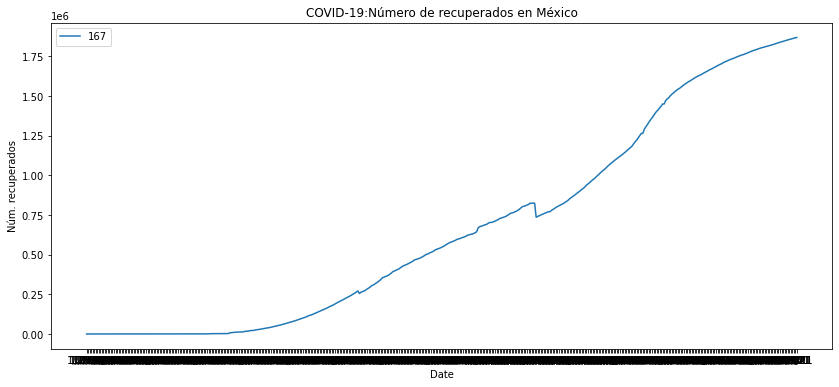

In [21]:
plt.figure(figsize=(14,6))
plt.title("COVID-19:Número de recuperados en México")
plt.xlabel('Date')
plt.ylabel('Núm. recuperados')
sns.lineplot(data = recoverd_data[recoverd_data['Country/Region'] == 'Mexico'].iloc[:,4:].T)

confirmed,death and revocer tienen la misma estructura de datos. Son series de tiempo

##### Qué tipo de datos hay en las columnas ObservationDate y LastUpdate

In [27]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285307 entries, 0 to 285306
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              285307 non-null  int64  
 1   ObservationDate  285307 non-null  object 
 2   Province/State   212318 non-null  object 
 3   Country/Region   285307 non-null  object 
 4   Last Update      285307 non-null  object 
 5   Confirmed        285307 non-null  float64
 6   Deaths           285307 non-null  float64
 7   Recovered        285307 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 17.4+ MB


Podemos especificar que esas columnas son fechas desde la importación del dataframe

In [10]:
covid_data = pd.read_csv(covid_path, parse_dates=['ObservationDate','Last Update'])

In [11]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285307 entries, 0 to 285306
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   SNo              285307 non-null  int64         
 1   ObservationDate  285307 non-null  datetime64[ns]
 2   Province/State   212318 non-null  object        
 3   Country/Region   285307 non-null  object        
 4   Last Update      285307 non-null  datetime64[ns]
 5   Confirmed        285307 non-null  float64       
 6   Deaths           285307 non-null  float64       
 7   Recovered        285307 non-null  float64       
dtypes: datetime64[ns](2), float64(3), int64(1), object(2)
memory usage: 17.4+ MB


In [12]:
muestra = int(covid_data.shape[0]*.40)
covid_data.sample(10,random_state=muestra)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
270727,270728,2021-04-13,Unknown,Germany,2021-04-14 04:20:41,9660.0,0.0,0.0
120507,120508,2020-09-28,NaN,Luxembourg,2021-04-02 15:13:53,8376.0,124.0,7128.0
68234,68235,2020-07-19,Yukon,Canada,2021-04-02 15:13:53,13.0,0.0,11.0
131354,131355,2020-10-12,Nagasaki,Japan,2021-04-02 15:13:53,241.0,3.0,233.0
38228,38229,2020-06-08,Xinjiang,Mainland China,2021-04-02 15:13:53,76.0,3.0,73.0
99577,99578,2020-08-31,NaN,Cameroon,2021-04-02 15:13:53,19142.0,411.0,17651.0
242638,242639,2021-03-08,NaN,North Macedonia,2021-04-02 15:13:53,107479.0,3206.0,95410.0
215459,215460,2021-01-31,Liaoning,Mainland China,2021-04-02 15:13:53,400.0,2.0,384.0
173324,173325,2020-12-07,Capital District,Colombia,2021-04-02 15:13:53,390902.0,8744.0,361727.0
262596,262597,2021-04-03,Assam,India,2021-04-04 04:20:49,218601.0,1107.0,215549.0


##### ¿Que pasa con los valores nulos o vacios? NaN,Null

In [13]:
# Totales de nulos por columna:
# covid_data.isnull().sum()
# Proporción_
((covid_data.isnull().sum()/covid_data.shape[0])*100).sort_values(ascending=False)

Province/State     25.582618
SNo                 0.000000
ObservationDate     0.000000
Country/Region      0.000000
Last Update         0.000000
Confirmed           0.000000
Deaths              0.000000
Recovered           0.000000
dtype: float64

Hay un 25.6% de valores nulos concentrados en la variable Province/State

In [14]:
total_of_all = covid_data.isnull().sum().sort_values(ascending=False)
percent_of_all = ((covid_data.isnull().sum()/covid_data.shape[0])*100).sort_values(ascending=False)
missing_data_set = pd.concat([total_of_all,percent_of_all], axis=1,keys=['Totales Nulos','Porcentaje'])
missing_data_set

,Totales Nulos,Porcentaje
Province/State,72989,25.582618
SNo,0,0.000000
ObservationDate,0,0.000000
Country/Region,0,0.000000
Last Update,0,0.000000
Confirmed,0,0.000000
Deaths,0,0.000000
Recovered,0,0.000000


##### Eliminando una columna
#### SNo es una columna que no porporciona valor

In [15]:
# covid_data = covid_data.drop(['SNo'],axis=1)
covid_data = covid_data.drop(columns=['SNo'])

In [4]:
covid_data

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...
285302,2021-05-02,Zaporizhia Oblast,Ukraine,2021-05-03 04:20:39,96531.0,1919.0,78700.0
285303,2021-05-02,Zeeland,Netherlands,2021-05-03 04:20:39,26045.0,233.0,0.0
285304,2021-05-02,Zhejiang,Mainland China,2021-05-03 04:20:39,1344.0,1.0,1322.0
285305,2021-05-02,Zhytomyr Oblast,Ukraine,2021-05-03 04:20:39,84641.0,1597.0,68529.0


Valores nulos de una columna

In [16]:
covid_data[covid_data['Province/State'].isnull()]

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
35,2020-01-22,NaN,Japan,2020-01-22 17:00:00,2.0,0.0,0.0
36,2020-01-22,NaN,Thailand,2020-01-22 17:00:00,4.0,0.0,2.0
37,2020-01-22,NaN,South Korea,2020-01-22 17:00:00,1.0,0.0,0.0
74,2020-01-23,NaN,Japan,2020-01-23 17:00:00,1.0,0.0,0.0
75,2020-01-23,NaN,Thailand,2020-01-23 17:00:00,4.0,0.0,2.0
...,...,...,...,...,...,...,...
284709,2021-05-02,NaN,Vietnam,2021-05-03 04:20:39,2962.0,35.0,2549.0
284710,2021-05-02,NaN,West Bank and Gaza,2021-05-03 04:20:39,297638.0,3272.0,275392.0
284711,2021-05-02,NaN,Yemen,2021-05-03 04:20:39,6341.0,1233.0,2875.0
284712,2021-05-02,NaN,Zambia,2021-05-03 04:20:39,91693.0,1253.0,90082.0


Evaluando condiciones logicas en una columna

In [20]:
covid_data[covid_data['Country/Region'] == "Japan"]

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
35,2020-01-22,NaN,Japan,2020-01-22 17:00:00,2.0,0.0,0.0
74,2020-01-23,NaN,Japan,2020-01-23 17:00:00,1.0,0.0,0.0
121,2020-01-24,NaN,Japan,2020-01-24 17:00:00,2.0,0.0,0.0
163,2020-01-25,NaN,Japan,2020-01-25 17:00:00,2.0,0.0,0.0
210,2020-01-26,NaN,Japan,2020-01-26 16:00:00,4.0,0.0,1.0
...,...,...,...,...,...,...,...
285245,2021-05-02,Unknown,Japan,2021-05-03 04:20:39,8.0,0.0,8.0
285279,2021-05-02,Wakayama,Japan,2021-05-03 04:20:39,2221.0,27.0,1822.0
285291,2021-05-02,Yamagata,Japan,2021-05-03 04:20:39,1537.0,34.0,1308.0
285292,2021-05-02,Yamaguchi,Japan,2021-05-03 04:20:39,1890.0,46.0,1545.0


Obteniedo numero de valores nulos por país "Japan" en las columnas:death,confirmed y recovered

In [17]:
# covid_data[covid_data['Country/Region']== "Japan"].groupby(['Country/Region','Province/State']).sum()
# Total
covid_data[covid_data['Country/Region']== "Japan"].groupby(['Country/Region','Province/State']).sum().sum()
# Especificando que la consulta anterior toma lso valores sin NaN
# covid_data[covid_data['Country/Region'] == "Japan"].dropna().groupby(['Province/State']).aggregate(sum).sum()

Confirmed    70297112.0
Deaths        1243194.0
Recovered    62014463.0
dtype: float64

In [18]:
covid_data[covid_data['Country/Region'] == 'Japan'].sum()

Country/Region    JapanJapanJapanJapanJapanJapanJapanJapanJapanJ...
Confirmed                                                71009133.0
Deaths                                                    1268431.0
Recovered                                                62296199.0
dtype: object

Existe una diferencia cuando se hace el total de los valores ya que en una toma en cuenta los valores nullos y entra no.

In [35]:
covid_data[covid_data['Country/Region'] == 'Japan'].sum()-covid_data[covid_data['Country/Region']== "Japan"].groupby(['Country/Region','Province/State']).sum().sum()

Confirmed         712021.0
Country/Region         NaN
Deaths             25237.0
Recovered         281736.0
dtype: object

In [96]:
# Diferneica entre totales con NaN y sin Nan
covid_data[covid_data['Country/Region'] == "Japan"].dropna().groupby(['Province/State']).aggregate(sum).sum()

Confirmed    70297112.0
Deaths        1243194.0
Recovered    62014463.0
dtype: float64

##### Rellenando los valores Nan/Null por un valor en especifico

In [19]:
# covid_data['Province/State'].fillna('Not know').value_counts()
covid_data['Province/State'] = covid_data['Province/State'].fillna('Not know')

Como ya se han rellenado los valores NaN por "Not Know", el total ya puede inlcuir todos los valores

In [20]:
covid_data[covid_data['Country/Region'] == 'Japan'].groupby(["Country/Region","Province/State"]).sum().sum()

Confirmed    71009133.0
Deaths        1268431.0
Recovered    62296199.0
dtype: float64

In [21]:
# covid_data.isna().sum()
covid_data.isnull().sum()

ObservationDate    0
Province/State     0
Country/Region     0
Last Update        0
Confirmed          0
Deaths             0
Recovered          0
dtype: int64

In [113]:
# covid_data.info()
covid_data.dtypes

ObservationDate    datetime64[ns]
Province/State             object
Country/Region             object
Last Update        datetime64[ns]
Confirmed                 float64
Deaths                    float64
Recovered                 float64
dtype: object

##### ¿Cuál es la fecha más reciente registrada en la columna Last Update?

In [119]:
# covid_data['Last Update'].sort_values(ascending=False)
# covid_data['Last Update'].max() <- Timestamp('2021-05-03 04:20:39')
print('Last update: ' + str(covid_data['Last Update'].max()))

Last update: 2021-05-03 04:20:39


Obteniendo los datos únicos de la columna 'Province/State'

In [120]:
covid_data['Province/State'].unique()

array(['Anhui', 'Beijing', 'Chongqing', 'Fujian', 'Gansu', 'Guangdong',
       'Guangxi', 'Guizhou', 'Hainan', 'Hebei', 'Heilongjiang', 'Henan',
       'Hong Kong', 'Hubei', 'Hunan', 'Inner Mongolia', 'Jiangsu',
       'Jiangxi', 'Jilin', 'Liaoning', 'Macau', 'Ningxia', 'Qinghai',
       'Shaanxi', 'Shandong', 'Shanghai', 'Shanxi', 'Sichuan', 'Taiwan',
       'Tianjin', 'Tibet', 'Washington', 'Xinjiang', 'Yunnan', 'Zhejiang',
       'Not know', 'Unknown', 'Chicago', 'Illinois', 'California',
       'Arizona', 'Ontario', 'New South Wales', 'Victoria',
       'British Columbia', 'Bavaria', 'Queensland', 'Chicago, IL',
       'South Australia', 'Boston, MA', 'Los Angeles, CA', 'Orange, CA',
       'Santa Clara, CA', 'Seattle, WA', 'Tempe, AZ', 'San Benito, CA',
       'Toronto, ON', 'London, ON', 'Madison, WI', 'Cruise Ship',
       'Diamond Princess cruise ship', 'San Diego County, CA',
       'San Antonio, TX', 'Ashland, NE', 'Travis, CA',
       'From Diamond Princess', 'Lackland, TX',

Cambiando los valores NaN por el valor que hay en la columna Country/Region

In [23]:
covid_data = pd.read_csv(covid_path, parse_dates=['ObservationDate','Last Update'])

In [24]:
covid_data = covid_data.drop(columns='SNo')

In [25]:
# covid_data['Province/State'].fillna(covid_data['Country/Region']).value_counts()
covid_data['Province/State'].fillna(covid_data['Country/Region'],inplace=True)
# Anteriormente los habíamos cambiado por un Not Know
# covid_data['Province/State'] = covid_data['Province/State'].fillna('Not know')

In [7]:
covid_data.groupby(['Country/Region','Province/State']).agg({'Province/State':sum,'Confirmed':[sum,np.mean]}).tail(10)

Province/State  \
                                                                                                             sum   
Country/Region                 Province/State                                                                      
Uzbekistan                     Uzbekistan                      UzbekistanUzbekistanUzbekistanUzbekistanUzbeki...   
Vanuatu                        Vanuatu                         VanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanu...   
Vatican City                   Vatican City                     Vatican CityVatican CityVatican CityVatican City   
Venezuela                      Venezuela                       VenezuelaVenezuelaVenezuelaVenezuelaVenezuelaV...   
Vietnam                        Vietnam                         VietnamVietnamVietnamVietnamVietnamVietnamViet...   
West Bank and Gaza             West Bank and Gaza              West Bank and GazaWest Bank and GazaWest Bank ...   
Yemen                          Yemen                           YemenYemenYemenYemenYemenYemenYemenYemenYemenY...   
Zambia                         Zambia                          ZambiaZambiaZambiaZambiaZambiaZambiaZambiaZamb...   
Zimbabwe                       Zimbabwe                        ZimbabweZimbabweZimbabweZimbabweZimbabweZimbab...   
occupied Palestinian territory occupied Palestinian territory  occupied Palestinian territoryoccupied Palesti...   

                                                                Confirmed  \
                                                                      sum   
Country/Region                 Province/State                               
Uzbekistan                     Uzbekistan                      19606501.0   
Vanuatu                        Vanuatu                              298.0   
Vatican City                   Vatican City                           4.0   
Venezuela                      Venezuela                       30137821.0   
Vietnam                        Vietnam                           496676.0   
West Bank and Gaza             West Bank and Gaza              33622052.0   
Yemen                          Yemen                             785028.0   
Zambia                         Zambia                          10991488.0   
Zimbabwe                       Zimbabwe                         5443118.0   
occupied Palestinian territory occupied Palestinian territory        25.0   

                                                                             
                                                                       mean  
Country/Region                 Province/State                                
Uzbekistan                     Uzbekistan                      47358.698068  
Vanuatu                        Vanuatu                             1.712644  
Vatican City                   Vatican City                        1.000000  
Venezuela                      Venezuela                       72621.255422  
Vietnam                        Vietnam                          1065.828326  
West Bank and Gaza             West Bank and Gaza              83429.409429  
Yemen                          Yemen                            2023.268041  
Zambia                         Zambia                          26743.279805  
Zimbabwe                       Zimbabwe                        13308.356968  
occupied Palestinian territory occupied Palestinian territory      3.571429

Valores únicos de 'Country/Region'

In [176]:
covid_data['Country/Region'].unique()

array(['Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'US', 'Japan',
       'Thailand', 'South Korea', 'China', 'Singapore', 'Philippines',
       'Malaysia', 'Vietnam', 'Australia', 'Mexico', 'Brazil', 'Colombia',
       'France', 'Nepal', 'Canada', 'Cambodia', 'Sri Lanka',
       'Ivory Coast', 'Germany', 'Finland', 'United Arab Emirates',
       'India', 'Italy', 'UK', 'Russia', 'Sweden', 'Spain', 'Belgium',
       'Others', 'Egypt', 'Iran', 'Israel', 'Lebanon', 'Iraq', 'Oman',
       'Afghanistan', 'Bahrain', 'Kuwait', 'Austria', 'Algeria',
       'Croatia', 'Switzerland', 'Pakistan', 'Georgia', 'Greece',
       'North Macedonia', 'Norway', 'Romania', 'Denmark', 'Estonia',
       'Netherlands', 'San Marino', ' Azerbaijan', 'Belarus', 'Iceland',
       'Lithuania', 'New Zealand', 'Nigeria', 'North Ireland', 'Ireland',
       'Luxembourg', 'Monaco', 'Qatar', 'Ecuador', 'Azerbaijan',
       'Czech Republic', 'Armenia', 'Dominican Republic', 'Indonesia',
       'Portugal', 'Andorra'

##### Acomodando los datos por regiones y estados

In [185]:
# new_df = pd.pivot_table(origin_df,index=['col_nam1','col_nam2'],aggfun=fun_agregacion)
pivote_pais = pd.pivot_table(covid_data,index=['Country/Region','Province/State'], aggfunc=np.max)
pivote_pais.head()
# type(pivote_pais)

,,Confirmed,Deaths,Last Update,ObservationDate,Recovered
Country/Region,Province/State,,,,,
Azerbaijan,Azerbaijan,1.0,0.0,2020-02-28 15:03:26,2020-02-28,0.0
"('St. Martin',)","('St. Martin',)",2.0,0.0,2020-03-10 05:33:02,2020-03-10,0.0
Afghanistan,Afghanistan,60122.0,2637.0,2021-05-03 04:20:39,2021-05-02,53391.0
Albania,Albania,131238.0,2397.0,2021-05-03 04:20:39,2021-05-02,110920.0
Algeria,Algeria,122522.0,3270.0,2021-05-03 04:20:39,2021-05-02,85398.0


En especifico un páis

In [187]:
pivote_pais.loc['Mexico'].head()

,Confirmed,Deaths,Last Update,ObservationDate,Recovered
Province/State,,,,,
Aguascalientes,26062.0,2372.0,2021-05-03 04:20:39,2021-05-02,8450.0
Baja California,47743.0,8055.0,2021-05-03 04:20:39,2021-05-02,18915.0
Baja California Sur,30369.0,1361.0,2021-05-03 04:20:39,2021-05-02,11901.0
Campeche,9547.0,1191.0,2021-05-03 04:20:39,2021-05-02,5639.0
Chiapas,10957.0,1539.0,2021-05-03 04:20:39,2021-05-02,6730.0


### Creación de dataframes

In [191]:
China = covid_data[covid_data['Country/Region'] == 'Mainland China']
China.head()

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0


In [195]:
Mexico = covid_data[covid_data['Country/Region'] == 'Mexico']
Mexico.tail()

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
285219,2021-05-02,Tlaxcala,Mexico,2021-05-03 04:20:39,19479.0,2394.0,0.0
285247,2021-05-02,Unknown,Mexico,2021-05-03 04:20:39,0.0,0.0,1869529.0
285267,2021-05-02,Veracruz,Mexico,2021-05-03 04:20:39,59870.0,9582.0,0.0
285296,2021-05-02,Yucatan,Mexico,2021-05-03 04:20:39,37319.0,3636.0,0.0
285300,2021-05-02,Zacatecas,Mexico,2021-05-03 04:20:39,30059.0,2750.0,0.0


##### Orden de valores

In [26]:
# Orden: Primero por la fecha más reciente, luego por la letra del país y provincia más grande en el orden del abecedario
# covid_data.sort_values(['ObservationDate','Country/Region','Province/State'], ascending=False).head()
# ---------------------------------------
# Orden: Primero por la fecha más actigua, luego por la letra del país y provincia más chica en el orden del abecedario
covid_data = covid_data.sort_values(['ObservationDate','Country/Region','Province/State'])
covid_data.head()

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
38,2020-01-22,Unknown,China,2020-01-22 17:00:00,0.0,0.0,0.0
12,2020-01-22,Hong Kong,Hong Kong,2020-01-22 17:00:00,0.0,0.0,0.0
35,2020-01-22,Japan,Japan,2020-01-22 17:00:00,2.0,0.0,0.0
20,2020-01-22,Macau,Macau,2020-01-22 17:00:00,1.0,0.0,0.0
0,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0


.str habilita los metodos para datos tipo string <br>
.dt habilita los metodos para datos tipo datatime

In [91]:
# covid_data['Country/Region'].str.lower()
covid_data['Country/Region'].str.upper()
# covid_data['Last Update'].dt.date

38                     CHINA
12                 HONG KONG
35                     JAPAN
20                     MACAU
0             MAINLAND CHINA
                 ...        
284709               VIETNAM
284710    WEST BANK AND GAZA
284711                 YEMEN
284712                ZAMBIA
284713              ZIMBABWE
Name: Country/Region, Length: 285307, dtype: object

[[ ]] -> devuelve un dataframe <br>
[ ] -> devuelve una lista

In [231]:
# Dataframe
type(covid_data.groupby('Country/Region')[['ObservationDate']].min())

# Serie
# type(covid_data.groupby('Country/Region')['ObservationDate'].min())

pandas.core.frame.DataFrame

Agrupando por dos columnas y sacando el minimo en todas las columnas del datafrae

In [225]:
covid_data.groupby(['Country/Region','ObservationDate']).min()

Province/State  \
Country/Region                 ObservationDate                                   
 Azerbaijan                    2020-02-28                           Azerbaijan   
('St. Martin',)                2020-03-10                      ('St. Martin',)   
Afghanistan                    2020-02-24                          Afghanistan   
                               2020-02-25                          Afghanistan   
                               2020-02-26                          Afghanistan   
...                                                                        ...   
occupied Palestinian territory 2020-03-12       occupied Palestinian territory   
                               2020-03-14       occupied Palestinian territory   
                               2020-03-15       occupied Palestinian territory   
                               2020-03-16       occupied Palestinian territory   
                               2020-03-17       occupied Palestinian territory   

                                                       Last Update  Confirmed  \
Country/Region                 ObservationDate                                  
 Azerbaijan                    2020-02-28      2020-02-28 15:03:26        1.0   
('St. Martin',)                2020-03-10      2020-03-10 05:33:02        2.0   
Afghanistan                    2020-02-24      2020-02-24 23:33:02        1.0   
                               2020-02-25      2020-02-24 23:33:02        1.0   
                               2020-02-26      2020-02-24 23:33:02        1.0   
...                                                            ...        ...   
occupied Palestinian territory 2020-03-12      2020-03-11 20:53:02        0.0   
                               2020-03-14      2020-03-11 20:53:02        0.0   
                               2020-03-15      2020-03-11 20:53:02        0.0   
                               2020-03-16      2020-03-11 20:53:02        0.0   
                               2020-03-17      2020-03-11 20:53:02        0.0   

                                                Deaths  Recovered  
Country/Region                 ObservationDate                     
 Azerbaijan                    2020-02-28          0.0        0.0  
('St. Martin',)                2020-03-10          0.0        0.0  
Afghanistan                    2020-02-24          0.0        0.0  
                               2020-02-25          0.0        0.0  
                               2020-02-26          0.0        0.0  
...                                                ...        ...  
occupied Palestinian territory 2020-03-12          0.0        0.0  
                               2020-03-14          0.0        0.0  
                               2020-03-15          0.0        0.0  
                               2020-03-16          0.0        0.0  
                               2020-03-17          0.0        0.0  

[81549 rows x 5 columns]

Pero si solo se quiere agrupar por una columna y sacar el minimo en una sola columna

In [238]:
# covid_data.groupby('Country/Region')[['ObservationDate']].min()
covid_data.groupby('Country/Region')['ObservationDate'].min()

Country/Region
 Azerbaijan                      2020-02-28
('St. Martin',)                  2020-03-10
Afghanistan                      2020-02-24
Albania                          2020-03-09
Algeria                          2020-02-25
                                    ...    
West Bank and Gaza               2020-03-26
Yemen                            2020-04-10
Zambia                           2020-03-18
Zimbabwe                         2020-03-20
occupied Palestinian territory   2020-03-10
Name: ObservationDate, Length: 228, dtype: datetime64[ns]

######  Otra forma de seleccionar varias columnas

In [28]:
# covid_data.loc[:,['ObservationDate','Country/Region']]
covid_data[['ObservationDate','Country/Region']]

,ObservationDate,Country/Region
38,2020-01-22,China
12,2020-01-22,Hong Kong
35,2020-01-22,Japan
20,2020-01-22,Macau
0,2020-01-22,Mainland China
...,...,...
284709,2021-05-02,Vietnam
284710,2021-05-02,West Bank and Gaza
284711,2021-05-02,Yemen
284712,2021-05-02,Zambia


En un Agrupamiento se debe seleccionar las columnas previo a aplicarlo

In [252]:
# covid_data[['ObservationDate','Country/Region']].groupby('Country/Region').min()

#Dataframe
# covid_data[['ObservationDate','Country/Region']].groupby('Country/Region')[['ObservationDate']].min()

# Serie
covid_data[['ObservationDate','Country/Region']].groupby('Country/Region')['ObservationDate'].min()

Country/Region
 Azerbaijan                      2020-02-28
('St. Martin',)                  2020-03-10
Afghanistan                      2020-02-24
Albania                          2020-03-09
Algeria                          2020-02-25
                                    ...    
West Bank and Gaza               2020-03-26
Yemen                            2020-04-10
Zambia                           2020-03-18
Zimbabwe                         2020-03-20
occupied Palestinian territory   2020-03-10
Name: ObservationDate, Length: 228, dtype: datetime64[ns]

#### Funcion transform() <br>
La función transform(fun) permite aplicar una función en cada una de las observaciones(filas) del dataframe

Obtener la fecha de observación minima de cada país

In [29]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.transform.html
# covid_data.groupby('Country/Region')[['ObservationDate']].min()
# covid_data[covid_data['Country/Region'] =='China'].groupby('ObservationDate').min()
# covid_data.shape[0]
covid_data.groupby('Country/Region')[['ObservationDate']].transform('min')
# China->38, Macau->20

,ObservationDate
38,2020-01-22
12,2020-01-22
35,2020-01-22
20,2020-01-22
0,2020-01-22
...,...
284709,2020-01-23
284710,2020-03-26
284711,2020-04-10
284712,2020-03-18


Obtener el promediio de muertes de cada país

In [94]:
covid_data.groupby('Country/Region')[['Deaths']].transform(np.mean)

,Deaths
38,0.000000
12,84.914347
35,75.790571
20,0.000000
0,131.912179
...,...
284709,19.695279
284710,864.136476
284711,522.801546
284712,418.233577


##### Agregar columnas

Se agrega la columna con la primera fecha de registro de pacientes covid de cada país

In [30]:
# covid_data.groupby('Country/Region')['ObservationDate'].transform(min)
covid_data['first_date'] = covid_data.groupby('Country/Region')['ObservationDate'].transform(min)
covid_data.tail()

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,first_date
284709,2021-05-02,Vietnam,Vietnam,2021-05-03 04:20:39,2962.0,35.0,2549.0,2020-01-23
284710,2021-05-02,West Bank and Gaza,West Bank and Gaza,2021-05-03 04:20:39,297638.0,3272.0,275392.0,2020-03-26
284711,2021-05-02,Yemen,Yemen,2021-05-03 04:20:39,6341.0,1233.0,2875.0,2020-04-10
284712,2021-05-02,Zambia,Zambia,2021-05-03 04:20:39,91693.0,1253.0,90082.0,2020-03-18
284713,2021-05-02,Zimbabwe,Zimbabwe,2021-05-03 04:20:39,38281.0,1570.0,35634.0,2020-03-20


Número de días que pasan entre la primera fecha y la fecha de observación

In [31]:
covid_data['days'] = (covid_data.ObservationDate - covid_data['first_date'])
covid_data.tail()

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,first_date,days
284709,2021-05-02,Vietnam,Vietnam,2021-05-03 04:20:39,2962.0,35.0,2549.0,2020-01-23,465 days
284710,2021-05-02,West Bank and Gaza,West Bank and Gaza,2021-05-03 04:20:39,297638.0,3272.0,275392.0,2020-03-26,402 days
284711,2021-05-02,Yemen,Yemen,2021-05-03 04:20:39,6341.0,1233.0,2875.0,2020-04-10,387 days
284712,2021-05-02,Zambia,Zambia,2021-05-03 04:20:39,91693.0,1253.0,90082.0,2020-03-18,410 days
284713,2021-05-02,Zimbabwe,Zimbabwe,2021-05-03 04:20:39,38281.0,1570.0,35634.0,2020-03-20,408 days


Quitando 'days'

In [32]:
covid_data['days_int'] = [int(str(x).split(' ')[0]) for x in covid_data['days']]

In [33]:
covid_data.head()

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,first_date,days,days_int
38,2020-01-22,Unknown,China,2020-01-22 17:00:00,0.0,0.0,0.0,2020-01-22,0 days,0
12,2020-01-22,Hong Kong,Hong Kong,2020-01-22 17:00:00,0.0,0.0,0.0,2020-01-22,0 days,0
35,2020-01-22,Japan,Japan,2020-01-22 17:00:00,2.0,0.0,0.0,2020-01-22,0 days,0
20,2020-01-22,Macau,Macau,2020-01-22 17:00:00,1.0,0.0,0.0,2020-01-22,0 days,0
0,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0,2020-01-22,0 days,0


In [109]:
covid_data = covid_data.drop(columns='days')
covid_data.head()

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,first_date,days_int
38,2020-01-22,Unknown,China,2020-01-22 17:00:00,0.0,0.0,0.0,2020-01-22,0
12,2020-01-22,Hong Kong,Hong Kong,2020-01-22 17:00:00,0.0,0.0,0.0,2020-01-22,0
35,2020-01-22,Japan,Japan,2020-01-22 17:00:00,2.0,0.0,0.0,2020-01-22,0
20,2020-01-22,Macau,Macau,2020-01-22 17:00:00,1.0,0.0,0.0,2020-01-22,0
0,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0,2020-01-22,0


Reiniciando indices para un nuevo dataframe <br>
En este caso se hace una consulta que porporciona un dataframe y al que se le asigna una nueva serie de indices

In [34]:
covid_data[['ObservationDate','Country/Region']].groupby('Country/Region').min().reset_index()

,Country/Region,ObservationDate
0,Azerbaijan,2020-02-28
1,"('St. Martin',)",2020-03-10
2,Afghanistan,2020-02-24
3,Albania,2020-03-09
4,Algeria,2020-02-25
...,...,...
223,West Bank and Gaza,2020-03-26
224,Yemen,2020-04-10
225,Zambia,2020-03-18
226,Zimbabwe,2020-03-20


Seleccion de valores de un dataframe mediante indices con df.iloc[fila,columna]

In [111]:
# covid_data.iloc[3000:31000]
# covid_data.iloc[3000,5:7]
# covid_data.head(10)
covid_data.iloc[4:9,1:4]

,Province/State,Country/Region,Last Update
0,Anhui,Mainland China,2020-01-22 17:00:00
1,Beijing,Mainland China,2020-01-22 17:00:00
2,Chongqing,Mainland China,2020-01-22 17:00:00
3,Fujian,Mainland China,2020-01-22 17:00:00
4,Gansu,Mainland China,2020-01-22 17:00:00


Seleccion de valores de un dataframe mediante nombre de columnas con df.loc[fila,['col1','col2','col3']]

In [112]:
# covid_data.loc[38:20,:]
covid_data.loc[38:8,['Province/State','Deaths', 'Recovered']]

,Province/State,Deaths,Recovered
38,Unknown,0.0,0.0
12,Hong Kong,0.0,0.0
35,Japan,0.0,0.0
20,Macau,0.0,0.0
0,Anhui,0.0,0.0
1,Beijing,0.0,0.0
2,Chongqing,0.0,0.0
3,Fujian,0.0,0.0
4,Gansu,0.0,0.0
5,Guangdong,0.0,0.0


# Análisis gráfico <br>
### Análisis del mundo

In [37]:
confirmed = covid_data.groupby('ObservationDate').sum()['Confirmed'].reset_index()
# confirmed
deaths = covid_data.groupby('ObservationDate').sum()['Deaths'].reset_index()
# deaths
recovered = covid_data.groupby('ObservationDate')['Recovered'].sum().reset_index()
recovered

,ObservationDate,Recovered
0,2020-01-22,30.0
1,2020-01-23,60.0
2,2020-01-24,39.0
3,2020-01-25,42.0
4,2020-01-26,56.0
...,...,...
462,2021-04-28,86843039.0
463,2021-04-29,87550355.0
464,2021-04-30,88236951.0
465,2021-05-01,88919401.0


### Barras <br>
Se crea una gráfica de barras para cada categoría correspondiente al día de observación

In [38]:
trace1 = go.Bar(x = confirmed['ObservationDate'],
               y = confirmed['Confirmed'],
               name = 'Confirmados',
               marker_color = 'blue')

layout = go.Layout(barmode = 'group',
                  bargap = 0,
                  bargroupgap = 0,
                  title = "Casos de Covid-19 Mundial: Confirmados",
                  xaxis = dict(title='Mes',zeroline = False,
                              gridcolor = 'rgb(183,183,183)',showline = True),
                  yaxis = dict(title='N° Casos',zeroline = False,
                                gridcolor = 'rgb(183,183,183)',showline = True),
                   font = dict(family = 'Courier New, monospace', size = 12, color= 'rgb(0,0,0)'),
                   legend = dict(x = 0, y = 1.0, bgcolor = 'rgba(255, 255, 255, 0)', bordercolor = 'rgba(255, 255, 255, 0)')
                  )

data = [trace1]
fig = go.Figure(data = data, layout= layout)
iplot(fig)

In [39]:
trace1 = go.Bar(x = confirmed['ObservationDate'],
               y = confirmed['Confirmed'],
               name = 'Confirmados',
               marker_color = 'blue')
trace2 = go.Bar(x = deaths['ObservationDate'],
               y = deaths['Deaths'],
               name = 'Muertos',
               marker_color = 'red')
trace3 = go.Bar(x = recovered['ObservationDate'],
               y = recovered['Recovered'],
               name = 'Recuperados',
               marker_color = 'green')

layout = go.Layout(barmode = 'group',
                  bargap = 0.2,  # permite una separación entre barras adjacentes
                  bargroupgap = 0, # separacón de barras entre la misma locación
                  title = "Casos de Covid-19 Mundial: Confirmados, Muertos y Recuperados",
                  xaxis = dict(title='Mes',zeroline = False,
                              gridcolor = 'rgb(183,183,183)',showline = True),
                  yaxis = dict(title='N° Casos',zeroline = False,
                                gridcolor = 'rgb(183,183,183)',showline = True),
                   font = dict(family = 'Courier New, monospace', size = 12, color= 'rgb(0,0,0)'),
                   legend = dict(x = 0, y = 1.0, bgcolor = 'rgba(255, 255, 255, 0)', bordercolor = 'rgba(255, 255, 255, 0)')
                  )

data = [trace1,trace2,trace3]
fig = go.Figure(data = data, layout= layout)
iplot(fig)

Una gráfica de barras atyyuda a identificar el número de veces que se repite una variable categorica.<br>
#### paquetería: plotly.graph_objs <- go

In [40]:
animals = ['jirafas','orangutanes','monos']
fig = go.Figure(data = [
                    go.Bar(name='SF Zoo', x = animals, y =[20,14,23]),
                    go.Bar(name='LA Zoo', x = animals, y =[12,18,29])
                        ]
               )
fig.show()

#### paquetería: plotly.expres <- px

In [41]:
fig = px.line(x = [-.5,1], y = [1,0])
fig.update_xaxes(showgrid=False, zeroline = True)
fig.update_yaxes(showgrid=False, zeroline = True)
fig.show()

### Scatter

In [42]:
trace1 = go.Scatter(x = confirmed['ObservationDate'],
                   y = confirmed['Confirmed'],
                   name = 'Confirmados',
                   mode = 'lines+markers',
                   line = dict(color = 'blue', width = 1)
                   )
trace2 = go.Scatter(x = deaths['ObservationDate'],
                   y = deaths['Deaths'],
                   name = 'Muertos',
                   mode = 'lines+markers',
                   line = dict(color = 'red', width = 1)
                   )
trace3 = go.Scatter(x = recovered['ObservationDate'],
                   y = recovered['Recovered'],
                   name = 'Recuperados',
                   mode = 'lines+markers',
                   line = dict(color = 'green', width = 1)
                   )

layout = go.Layout(barmode = 'group',
                  bargap = 0,  # permite una separación entre barras adjacentes
                  bargroupgap = 0, # separacón de barras entre la misma locación
                  title = "Casos de Covid-19 Mundial: Confirmados, Muertos y Recuperados",
                  xaxis = dict(title='Mes',zeroline = False,
                              gridcolor = 'rgb(183,183,183)',showline = True),
                  yaxis = dict(title='N° Casos',zeroline = False,
                                gridcolor = 'rgb(183,183,183)',showline = True),
                   font = dict(family = 'Courier New, monospace', size = 12, color= 'rgb(0,0,0)'),
                   legend = dict(x = 0, y = 1.0, bgcolor = 'rgba(255, 255, 255, 0)', bordercolor = 'rgba(255, 255, 255, 0)')
                  )

data = [trace1,trace2,trace3]
fig = go.Figure(data = data, layout= layout)
iplot(fig)

## Analísis por país <br>
#### Funciones

In [64]:
def country_data(country_name):
    country_data = covid_data[covid_data['Country/Region'] == country_name]
    return country_data

# country_data('Mexico')

def country_data_datewise (country):
    country_datewise = country.groupby(['ObservationDate']).agg({'Confirmed':sum,'Recovered':sum,'Deaths':sum})
    return country_datewise

# country_data_datewise (country_data('Mexico'))

In [69]:
# country_data('Mexico') #<-11391 rows × 16 columns y indices que no empiezan en cero
# country_data_datewise(country_data('Mexico')) #<- 431 rows × 3 columns con indices basados en una agrupación de Observationdate

,Confirmed,Recovered,Deaths
ObservationDate,,,
2020-01-23,0.0,0.0,0.0
2020-02-28,1.0,0.0,0.0
2020-02-29,4.0,0.0,0.0
2020-03-01,5.0,0.0,0.0
2020-03-02,5.0,0.0,0.0
...,...,...,...
2021-04-28,2336944.0,1858844.0,215918.0
2021-04-29,2340934.0,1861861.0,216447.0
2021-04-30,2344755.0,1864914.0,216907.0


In [70]:
def country_all_data (country_data_name):
    country_confirmed = country_data_name.groupby('ObservationDate').sum()['Confirmed'].reset_index()
    country_deaths = country_data_name.groupby('ObservationDate').sum()['Deaths'].reset_index()
    country_recovered = country_data_name.groupby('ObservationDate').sum()['Recovered'].reset_index()
    return (country_confirmed,country_deaths,country_recovered)

In [87]:
country_all_data(country_data('Mexico')) # <- [431 rows x 2 columns] con indices basados en una agrupación de Observationdate
# type(country_all_data(country_data('Mexico'))[2]) <- dataframe
# type(country_all_data(country_data('Mexico'))) <- tuple

(    ObservationDate  Confirmed
 0        2020-01-23        0.0
 1        2020-02-28        1.0
 2        2020-02-29        4.0
 3        2020-03-01        5.0
 4        2020-03-02        5.0
 ..              ...        ...
 426      2021-04-28  2336944.0
 427      2021-04-29  2340934.0
 428      2021-04-30  2344755.0
 429      2021-05-01  2347780.0
 430      2021-05-02  2348873.0
 
 [431 rows x 2 columns],
     ObservationDate    Deaths
 0        2020-01-23       0.0
 1        2020-02-28       0.0
 2        2020-02-29       0.0
 3        2020-03-01       0.0
 4        2020-03-02       0.0
 ..              ...       ...
 426      2021-04-28  215918.0
 427      2021-04-29  216447.0
 428      2021-04-30  216907.0
 429      2021-05-01  217168.0
 430      2021-05-02  217233.0
 
 [431 rows x 2 columns],
     ObservationDate  Recovered
 0        2020-01-23        0.0
 1        2020-02-28        0.0
 2        2020-02-29        0.0
 3        2020-03-01        0.0
 4        2020-03-02        0.

**Mortality and Recovery Factor**
* Mortality rate = (Number of Death Cases / Number of Confirmed Cases) x 100
* Recovery Rate= (Number of Recoverd Cases / Number of Confirmed Cases) x 100
* Mortality rate is showing a considerable for a pretty long time, which is positive sign
* Recovery Rate has started to pick up again which is a good sign, another supportive reason to why number of Closed Cases are increasing

**Growth Factor**
* Growth factor is the factor by which a quantity multiplies itself over time. The formula used is:
* Formula: Every day's new (Confirmed,Recovered,Deaths) / new (Confirmed,Recovered,Deaths) on the previous day.

In [50]:
# Funcion para cada país
def all_rate(country_datewise):
    country_datewise["Mortality Rate"]=(country_datewise["Deaths"]/country_datewise["Confirmed"])*100
    country_datewise["Recovery Rate"]=(country_datewise["Recovered"]/country_datewise["Confirmed"])*100
    country_datewise["Active Cases"]=country_datewise["Confirmed"]-country_datewise["Recovered"]-country_datewise["Deaths"]
    country_datewise["Closed Cases"]=country_datewise["Recovered"]+country_datewise["Deaths"]
    country_datewise['Growth Rate Acitve Case'] = (country_datewise["Confirmed"]-country_datewise["Recovered"]-country_datewise["Deaths"])/\
                                            (country_datewise["Confirmed"]-country_datewise["Recovered"]-country_datewise["Deaths"]).shift()
    country_datewise['Growth Rate Closed Case'] = (country_datewise["Recovered"]+country_datewise["Deaths"])/\
                                                (country_datewise["Recovered"]+country_datewise["Deaths"]).shift()
    return country_datewise

##### df.shift() <br> 
Se utiliza para desplaar el índice de df por un número determinado de períodos con una frecuencía de tiempo opcional

In [46]:
# (covid_data["Recovered"]+covid_data["Deaths"])
# (covid_data["Recovered"]+covid_data["Deaths"]).shift()
(covid_data["Recovered"]+covid_data["Deaths"])/(covid_data["Recovered"]+covid_data["Deaths"]).shift()

38               NaN
12               NaN
35               NaN
20               NaN
0                NaN
             ...    
284709      0.014161
284710    107.842105
284711      0.014742
284712     22.233447
284713      0.407336
Length: 285307, dtype: float64

In [51]:
all_rate(covid_data)

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,first_date,days,days_int,Mortality Rate,Recovery Rate,Active Cases,Closed Cases,Growth Rate Acitve Case,Growth Rate Closed Case
38,2020-01-22,Unknown,China,2020-01-22 17:00:00,0.0,0.0,0.0,2020-01-22,0 days,0,NaN,NaN,0.0,0.0,NaN,NaN
12,2020-01-22,Hong Kong,Hong Kong,2020-01-22 17:00:00,0.0,0.0,0.0,2020-01-22,0 days,0,NaN,NaN,0.0,0.0,NaN,NaN
35,2020-01-22,Japan,Japan,2020-01-22 17:00:00,2.0,0.0,0.0,2020-01-22,0 days,0,0.000000,0.000000,2.0,0.0,inf,NaN
20,2020-01-22,Macau,Macau,2020-01-22 17:00:00,1.0,0.0,0.0,2020-01-22,0 days,0,0.000000,0.000000,1.0,0.0,0.500000,NaN
0,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0,2020-01-22,0 days,0,0.000000,0.000000,1.0,0.0,1.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284709,2021-05-02,Vietnam,Vietnam,2021-05-03 04:20:39,2962.0,35.0,2549.0,2020-01-23,465 days,465,1.181634,86.056718,378.0,2584.0,0.021485,0.014161
284710,2021-05-02,West Bank and Gaza,West Bank and Gaza,2021-05-03 04:20:39,297638.0,3272.0,275392.0,2020-03-26,402 days,402,1.099322,92.525820,18974.0,278664.0,50.195767,107.842105
284711,2021-05-02,Yemen,Yemen,2021-05-03 04:20:39,6341.0,1233.0,2875.0,2020-04-10,387 days,387,19.444883,45.339852,2233.0,4108.0,0.117687,0.014742
284712,2021-05-02,Zambia,Zambia,2021-05-03 04:20:39,91693.0,1253.0,90082.0,2020-03-18,410 days,410,1.366517,98.243050,358.0,91335.0,0.160322,22.233447


In [82]:
def plot_country_bar(country_confirmed, country_death, country_recovered, country_name):

    trace1 = go.Bar(x = country_confirmed['ObservationDate'],
              y = country_confirmed['Confirmed'],
              name = 'Confirmed',
              marker_color = 'blue')

    trace2 = go.Bar(x = country_death['ObservationDate'],
              y = country_death['Deaths'],
              name = 'Death',
              marker_color = 'red')

    trace3 = go.Bar(x = country_recovered['ObservationDate'],
              y = country_recovered['Recovered'],
              name = 'Recovered',
              marker_color = 'green')

    layout = go.Layout(barmode = 'group',
                  bargap = 0,
                  bargroupgap = 0,
                  title = "{} Corona Virus Cases - Confirmed, Deaths, Recovered (Bar Chart)".format(country_name),
                  xaxis = dict(title='Month',zeroline= False,
                         gridcolor='rgb(183,183,183)',showline=True),
                  yaxis = dict(title='No. of cases',zeroline= False,
                            gridcolor='rgb(183,183,183)',showline=True),
                  font = dict(family='Courier New, monospace', size=12, color='rgb(0,0,0)'),
                  legend=dict(x=0, y=1.0, bgcolor='rgba(255, 255, 255, 0)', bordercolor='rgba(255, 255, 255, 0)'),
    )

    data = [trace1, trace2, trace3]
    fig = go.Figure(data = data, layout = layout)
    iplot(fig)

# country_all_data(country_data('Mexico'))[2]

plot_country_bar(country_all_data(country_data('Mexico'))[0],country_all_data(country_data('Mexico'))[1],\
                 country_all_data(country_data('Mexico'))[2],'Mexico')

In [88]:
# function for countries line chart

def plot_country_line(country_confirmed, country_death, country_recovered, country_name):
    trace1 = go.Scatter(x = country_confirmed['ObservationDate'],
              y = country_confirmed['Confirmed'],
              name = 'Confirmed',
              mode='lines+markers',
              line=dict(color='blue', width=1))

    trace2 = go.Scatter(x = country_death['ObservationDate'],
              y = country_death['Deaths'],
              name = 'Death',
              mode='lines+markers',
              line=dict(color='red', width=1))

    trace3 = go.Scatter(x = country_recovered['ObservationDate'],
              y = country_recovered['Recovered'],
              name = 'Recovered',
              mode='lines+markers',
              line=dict(color='green', width=1))

    layout = go.Layout(title = "{} Corona Virus Cases - Confirmed, Deaths, Recovered (Line Chart)".format(country_name),
                  xaxis = dict(title='Month',zeroline= False,
                         gridcolor='rgb(183,183,183)',showline=True),
                  yaxis = dict(title='No. of cases',zeroline= False,
                            gridcolor='rgb(183,183,183)',showline=True),
                  font = dict(family='Courier New, monospace', size=12, color='rgb(0,0,0)'),
                  legend=dict(x=0, y=1.0, bgcolor='rgba(255, 255, 255, 0)', bordercolor='rgba(255, 255, 255, 0)'),
    )

    data = [trace1, trace2, trace3]
    fig = go.Figure(data = data, layout = layout)
    iplot(fig)
    
# country_all_data(country_data('Mexico'))[2]
    
plot_country_line(country_all_data(country_data('Mexico'))[0],country_all_data(country_data('Mexico'))[1],\
                  country_all_data(country_data('Mexico'))[2],'Mexico')

In [154]:
# function for mortlity and recovery rate for countries
def plot_country_mor_rec_rate(country_datewise_mor_rec, country_name):
    trace1 = go.Scatter(x = country_datewise_mor_rec.index,
              y = country_datewise_mor_rec['Mortality Rate'],
              name = 'Mortality Rate',
              mode='lines',
              line=dict(color='red', width=1.5))

    trace2 = go.Scatter(x = country_datewise_mor_rec.index,
              y = country_datewise_mor_rec['Recovery Rate'],
              name = 'Recovery Rate',
              mode='lines',
              line=dict(color='green', width=1.5))

    layout = go.Layout(title = "{} Corona Virus Cases - Mortality Rate ,Recovery Rate (Line Chart)".format(country_name),
                  xaxis = dict(title='Month',zeroline= False,
                         gridcolor='rgb(183,183,183)',showline=True),
                  yaxis = dict(title='Rate',zeroline= False,
                            gridcolor='rgb(183,183,183)',showline=True),
                  font = dict(family='Courier New, monospace', size=12, color='rgb(0,0,0)'),
                  legend=dict(x=0, y=1.0, bgcolor='rgba(255, 255, 255, 0)', bordercolor='rgba(255, 255, 255, 0)'),
    )

    data = [trace1, trace2]
    fig = go.Figure(data = data, layout = layout)
    iplot(fig)


# covid_rates_mex = all_rate(country_data_datewise(country_data('Mexico')))

plot_country_mor_rec_rate(covid_rates_mex,'Mexico')

In [155]:
# function for ploting grwoth rate of country

def plot_country_growth_rate(country_datewise_growth, country_name):
    trace1 = go.Scatter(x = country_datewise_growth.index,
              y = country_datewise_growth['Growth Rate Acitve Case'],
              name = 'Growth Rate Acitve Case',
              mode='lines',
              line=dict(color='blue', width=1.5))

    trace2 = go.Scatter(x = country_datewise_growth.index,
              y = country_datewise_growth['Growth Rate Closed Case'],
              name = 'Growth Rate Closed Case',
              mode='lines',
              line=dict(color='green', width=1.5))

    layout = go.Layout(title = "{} Corona Virus Cases - Growth Rate Acitve Case and Closed Case (Line Chart)".format(country_name),
                  xaxis = dict(title='Month',zeroline= False,
                         gridcolor='rgb(183,183,183)',showline=True),
                  yaxis = dict(title='Rate',zeroline= False,
                            gridcolor='rgb(183,183,183)',showline=True),
                  font = dict(family='Courier New, monospace', size=12, color='rgb(0,0,0)'),
                  legend=dict(x=0, y=1.0, bgcolor='rgba(255, 255, 255, 0)', bordercolor='rgba(255, 255, 255, 0)'),
    )

    data = [trace1, trace2]
    fig = go.Figure(data = data, layout = layout)
    iplot(fig)
plot_country_growth_rate(covid_rates_mex,'Mexico')

In [95]:
# country_all_data(country_data('Mexico'))[0] #<- confirmed
# country_all_data(country_data('Mexico'))[1] #<- death
# country_all_data(country_data('Mexico'))[2] #<- recoverd
mexico_confirmed, mexico_death, mexico_recoverd = country_all_data(country_data('Mexico'))
mexico_datewise = country_data_datewise(country_data('Mexico'))
mexico_rate = all_rate(mexico_datewise)

In [94]:
mexico_recoverd

,ObservationDate,Recovered
0,2020-01-23,0.0
1,2020-02-28,0.0
2,2020-02-29,0.0
3,2020-03-01,0.0
4,2020-03-02,0.0
...,...,...
426,2021-04-28,1858844.0
427,2021-04-29,1861861.0
428,2021-04-30,1864914.0
429,2021-05-01,1867191.0


In [98]:
mexico_datewise

,Confirmed,Recovered,Deaths,Mortality Rate,Recovery Rate,Active Cases,Closed Cases,Growth Rate Acitve Case,Growth Rate Closed Case
ObservationDate,,,,,,,,,
2020-01-23,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
2020-02-28,1.0,0.0,0.0,0.000000,0.000000,1.0,0.0,inf,NaN
2020-02-29,4.0,0.0,0.0,0.000000,0.000000,4.0,0.0,4.000000,NaN
2020-03-01,5.0,0.0,0.0,0.000000,0.000000,5.0,0.0,1.250000,NaN
2020-03-02,5.0,0.0,0.0,0.000000,0.000000,5.0,0.0,1.000000,NaN
...,...,...,...,...,...,...,...,...,...
2021-04-28,2336944.0,1858844.0,215918.0,9.239331,79.541658,262182.0,2074762.0,1.004390,1.001290
2021-04-29,2340934.0,1861861.0,216447.0,9.246181,79.534963,262626.0,2078308.0,1.001693,1.001709
2021-04-30,2344755.0,1864914.0,216907.0,9.250732,79.535559,262934.0,2081821.0,1.001173,1.001690


In [99]:
mexico_rate

,Confirmed,Recovered,Deaths,Mortality Rate,Recovery Rate,Active Cases,Closed Cases,Growth Rate Acitve Case,Growth Rate Closed Case
ObservationDate,,,,,,,,,
2020-01-23,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
2020-02-28,1.0,0.0,0.0,0.000000,0.000000,1.0,0.0,inf,NaN
2020-02-29,4.0,0.0,0.0,0.000000,0.000000,4.0,0.0,4.000000,NaN
2020-03-01,5.0,0.0,0.0,0.000000,0.000000,5.0,0.0,1.250000,NaN
2020-03-02,5.0,0.0,0.0,0.000000,0.000000,5.0,0.0,1.000000,NaN
...,...,...,...,...,...,...,...,...,...
2021-04-28,2336944.0,1858844.0,215918.0,9.239331,79.541658,262182.0,2074762.0,1.004390,1.001290
2021-04-29,2340934.0,1861861.0,216447.0,9.246181,79.534963,262626.0,2078308.0,1.001693,1.001709
2021-04-30,2344755.0,1864914.0,216907.0,9.250732,79.535559,262934.0,2081821.0,1.001173,1.001690


In [100]:
# Confirmados, muertos y recuperados México
plot_country_line(mexico_confirmed, mexico_death, mexico_recoverd, 'Mexico')
plot_country_bar(mexico_confirmed, mexico_death, mexico_recoverd, 'Mexico')

In [147]:
plot_country_mor_rec_rate(mexico_rate,'Mexico')
plot_country_growth_rate(mexico_rate,'Mexico')

In [21]:
covid_data.keys()

Index(['ObservationDate', 'Province/State', 'Country/Region', 'Last Update',
       'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

**---------------------------------------------------------------------------------------------------------------------**<br>
*Estudio

In [91]:
# covid_file[covid_file['Country/Region'] == 'Japan']
# covid_file['Province/State'].value_counts()

# [x for x in list(covid_file['Province/State']) if x == "Anhui" in x][:5]
# list(covid_file['Province/State'])[0]

# covid_file[(covid_file['ObservationDate'] == '01/27/2020') & (covid_file['Country/Region'] == 'Japan')]
# covid_file[(covid_file['Province/State'] == 'Unknown' ) & (covid_file['Country/Region'] == 'Japan') | (covid_file['ObservationDate'] == '01/27/2020')]
# covid_file[(covid_file['Province/State'] == 'Unknown' ) & (covid_file['ObservationDate'] == '01/27/2020')]

'Anhui'

Convirtiendo fechas en strings y enteros para extraer parte numerica de una cadena

In [ ]:
# str(covid_data['days'][46464])[0:3]
str(covid_data['days'][46464])
# for x in covid_data['days']:
#     print(str(x)[0:2])
# num = [int(str(covid_data['days'][x][0:3])) for x in covid_data['days'] if x.isdigit()]
# '149 days 00:00:00'.split(' ')[0]
# [int(str(x).split(' ')[0]) for x in covid_data['days']]

In [60]:
# secundaria = pd.DataFrame(np.array([['Rodrigo','A123',12],['Carlos','A123',14],['Beto','A123',15],['Jose','A123',12]]),
#                          columns=['alumno','salon','edad'])
# secundaria
secundaria = {'alumno':['Rodrigo','Carlos','Beto','Jose','Carolina','Karla','Clara','Karen','Lupita'],
             'salon':['A123','A122','A223','A123','A122','A122','A223','A223','A123'],
             'edad':[12,14,15,12,13,12,15,14,15]}
secundaria = pd.DataFrame(secundaria)
secundaria

,alumno,salon,edad
0,Rodrigo,A123,12
1,Carlos,A122,14
2,Beto,A223,15
3,Jose,A123,12
4,Carolina,A122,13
5,Karla,A122,12
6,Clara,A223,15
7,Karen,A223,14
8,Lupita,A123,15


In [62]:
secundaria.groupby('salon')[['edad']].agg(np.mean)
# covid_data.groupby('Country/Region')[['Deaths']].transform(np.mean)

,edad
salon,
A122,13.000000
A123,13.000000
A223,14.666667


In [63]:
mi_lista = [[1,2,3],[4,5,6],[7,8],[9,[10]]]

In [66]:
mi_lista[3][1][0]

10

In [68]:
mi_lista[0][0:2]

[1, 2]